In [ ]:
import logging

from judgesync import AlignmentTracker, ScoreRange

logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(name)s - %(levelname)s - %(message)s",
    datefmt="%H:%M:%S",
)

In [3]:
# Load your evaluation data
tracker = AlignmentTracker(score_range=ScoreRange.FIVE_POINT)
tracker.load_human_scores_from_csv("sample_data.csv")

16:24:34 - judgesync.alignment - INFO - Loading human scores from sample_data.csv
16:24:34 - judgesync.alignment - INFO - Loaded 50 items


# Prompt comparison

In [ ]:
prompt_comparison = tracker.create_comparison()

In [ ]:
prompt_comparison.add_judge(
    name="strict",
    system_prompt="You are a very strict evaluator. Only give high scores to great responses.",
)

prompt_comparison.add_judge(
    name="balanced",
    system_prompt="You are a balanced evaluator. Consider both strengths and weaknesses fairly.",
)

prompt_comparison.add_judge(
    name="lenient",
    system_prompt="You are a generous evaluator. Focus on the positive aspects of responses.",
)

#Prompts are appended with text relative to the point scale chosen.

In [10]:
prompt_comparison.judges['strict'].system_prompt

'You are a very strict evaluator. Only give high scores to exceptional responses.'

In [11]:
prompt_results = prompt_comparison.run_comparison(
    tracker.data_loader.items, use_async=True
)
print(prompt_results)

16:26:43 - judgesync.comparison - INFO - Comparing 3 judges on 50 items...
16:26:43 - judgesync.comparison - INFO - Running judge 'strict'...
16:26:43 - httpx - INFO - HTTP Request: POST https://judgealign.openai.azure.com/openai/deployments/gpt-4.1/chat/completions?api-version=2024-02-01 "HTTP/1.1 200 OK"
16:26:43 - httpx - INFO - HTTP Request: POST https://judgealign.openai.azure.com/openai/deployments/gpt-4.1/chat/completions?api-version=2024-02-01 "HTTP/1.1 200 OK"
16:26:43 - httpx - INFO - HTTP Request: POST https://judgealign.openai.azure.com/openai/deployments/gpt-4.1/chat/completions?api-version=2024-02-01 "HTTP/1.1 200 OK"
16:26:43 - httpx - INFO - HTTP Request: POST https://judgealign.openai.azure.com/openai/deployments/gpt-4.1/chat/completions?api-version=2024-02-01 "HTTP/1.1 200 OK"
16:26:43 - httpx - INFO - HTTP Request: POST https://judgealign.openai.azure.com/openai/deployments/gpt-4.1/chat/completions?api-version=2024-02-01 "HTTP/1.1 200 OK"
16:26:43 - httpx - INFO - HT

JUDGE COMPARISON RESULTS

Rankings by Kappa Score:
  1. strict: κ=0.178, Agreement=52.0%, Correlation=0.334
  2. balanced: κ=0.047, Agreement=32.0%, Correlation=0.455
  3. lenient: κ=-0.006, Agreement=8.0%, Correlation=0.265

🏆 Best Judge: strict


16:27:40 - judgesync.comparison - INFO - Figure saved to: prompt_comparison.png


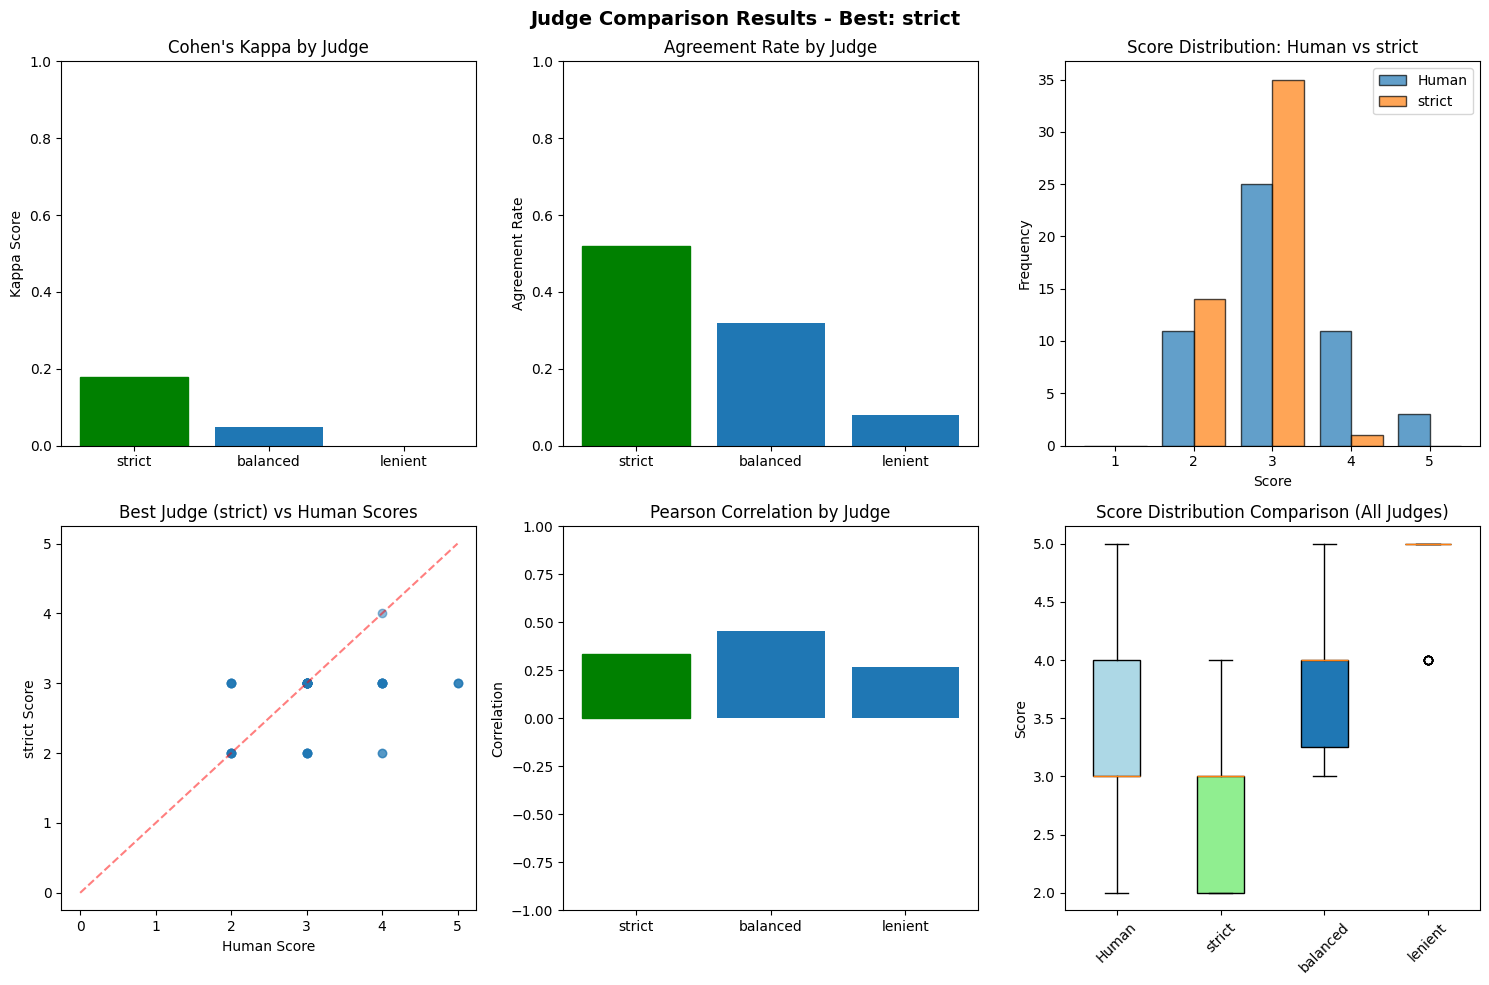

In [13]:
prompt_comparison.plot_comparison(
    prompt_results, save_path="prompt_comparison.png", show=True
)

In [15]:
prompt_comparison.add_judge(
    name="extremely_strict",
    system_prompt="You are an extremely strict evaluator. Only give high scores to exceptional responses.",
)

In [16]:
prompt_results = prompt_comparison.run_comparison(
    tracker.data_loader.items, use_async=True
)
print(prompt_results)

16:32:02 - judgesync.comparison - INFO - Comparing 4 judges on 50 items...
16:32:02 - judgesync.comparison - INFO - Running judge 'strict'...
16:32:03 - httpx - INFO - HTTP Request: POST https://judgealign.openai.azure.com/openai/deployments/gpt-4.1/chat/completions?api-version=2024-02-01 "HTTP/1.1 200 OK"
16:32:03 - httpx - INFO - HTTP Request: POST https://judgealign.openai.azure.com/openai/deployments/gpt-4.1/chat/completions?api-version=2024-02-01 "HTTP/1.1 200 OK"
16:32:03 - httpx - INFO - HTTP Request: POST https://judgealign.openai.azure.com/openai/deployments/gpt-4.1/chat/completions?api-version=2024-02-01 "HTTP/1.1 200 OK"
16:32:03 - httpx - INFO - HTTP Request: POST https://judgealign.openai.azure.com/openai/deployments/gpt-4.1/chat/completions?api-version=2024-02-01 "HTTP/1.1 200 OK"
16:32:03 - httpx - INFO - HTTP Request: POST https://judgealign.openai.azure.com/openai/deployments/gpt-4.1/chat/completions?api-version=2024-02-01 "HTTP/1.1 200 OK"
16:32:03 - httpx - INFO - HT

JUDGE COMPARISON RESULTS

Rankings by Kappa Score:
  1. extremely_strict: κ=0.166, Agreement=48.0%, Correlation=0.359
  2. strict: κ=0.101, Agreement=48.0%, Correlation=0.365
  3. balanced: κ=0.023, Agreement=30.0%, Correlation=0.473
  4. lenient: κ=-0.006, Agreement=8.0%, Correlation=0.265

🏆 Best Judge: extremely_strict


16:32:23 - judgesync.comparison - INFO - Figure saved to: prompt_comparison.png


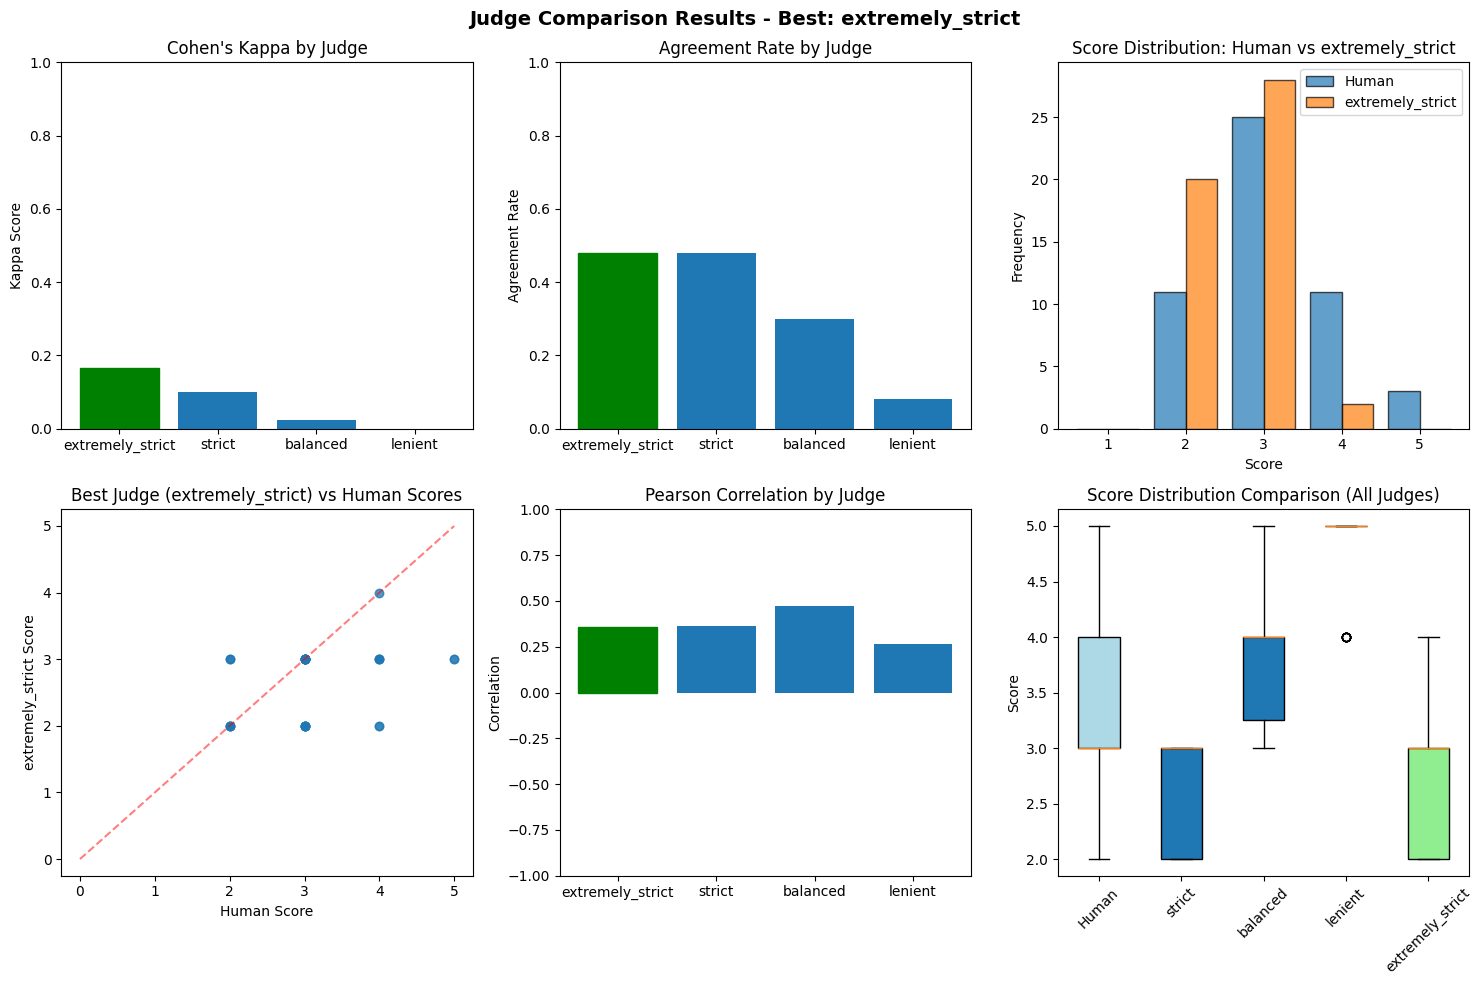

In [17]:
prompt_comparison.plot_comparison(
    prompt_results, save_path="prompt_comparison.png", show=True
)

# Comparing different model configurations

In [18]:
model_comparison = tracker.create_comparison()

model_comparison.add_judge(
    name="gpt-4-cold",
    system_prompt="Evaluate the response quality.",
    temperature=0.0,
)

model_comparison.add_judge(
    name="gpt-4-warm",
    system_prompt="Evaluate the response quality.",
    temperature=0.7,
)

In [19]:
model_results = model_comparison.run_comparison(
    tracker.data_loader.items, use_async=True
)
print(model_results)

16:34:30 - judgesync.comparison - INFO - Comparing 2 judges on 50 items...
16:34:30 - judgesync.comparison - INFO - Running judge 'gpt-4-cold'...
16:34:31 - httpx - INFO - HTTP Request: POST https://judgealign.openai.azure.com/openai/deployments/gpt-4.1/chat/completions?api-version=2024-02-01 "HTTP/1.1 200 OK"
16:34:31 - httpx - INFO - HTTP Request: POST https://judgealign.openai.azure.com/openai/deployments/gpt-4.1/chat/completions?api-version=2024-02-01 "HTTP/1.1 200 OK"
16:34:31 - httpx - INFO - HTTP Request: POST https://judgealign.openai.azure.com/openai/deployments/gpt-4.1/chat/completions?api-version=2024-02-01 "HTTP/1.1 200 OK"
16:34:31 - httpx - INFO - HTTP Request: POST https://judgealign.openai.azure.com/openai/deployments/gpt-4.1/chat/completions?api-version=2024-02-01 "HTTP/1.1 200 OK"
16:34:31 - httpx - INFO - HTTP Request: POST https://judgealign.openai.azure.com/openai/deployments/gpt-4.1/chat/completions?api-version=2024-02-01 "HTTP/1.1 200 OK"
16:34:31 - httpx - INFO 

JUDGE COMPARISON RESULTS

Rankings by Kappa Score:
  1. gpt-4-cold: κ=0.091, Agreement=30.0%, Correlation=0.538
  2. gpt-4-warm: κ=0.025, Agreement=24.0%, Correlation=0.497

🏆 Best Judge: gpt-4-cold


16:34:59 - judgesync.comparison - INFO - Figure saved to: model_comparison.png


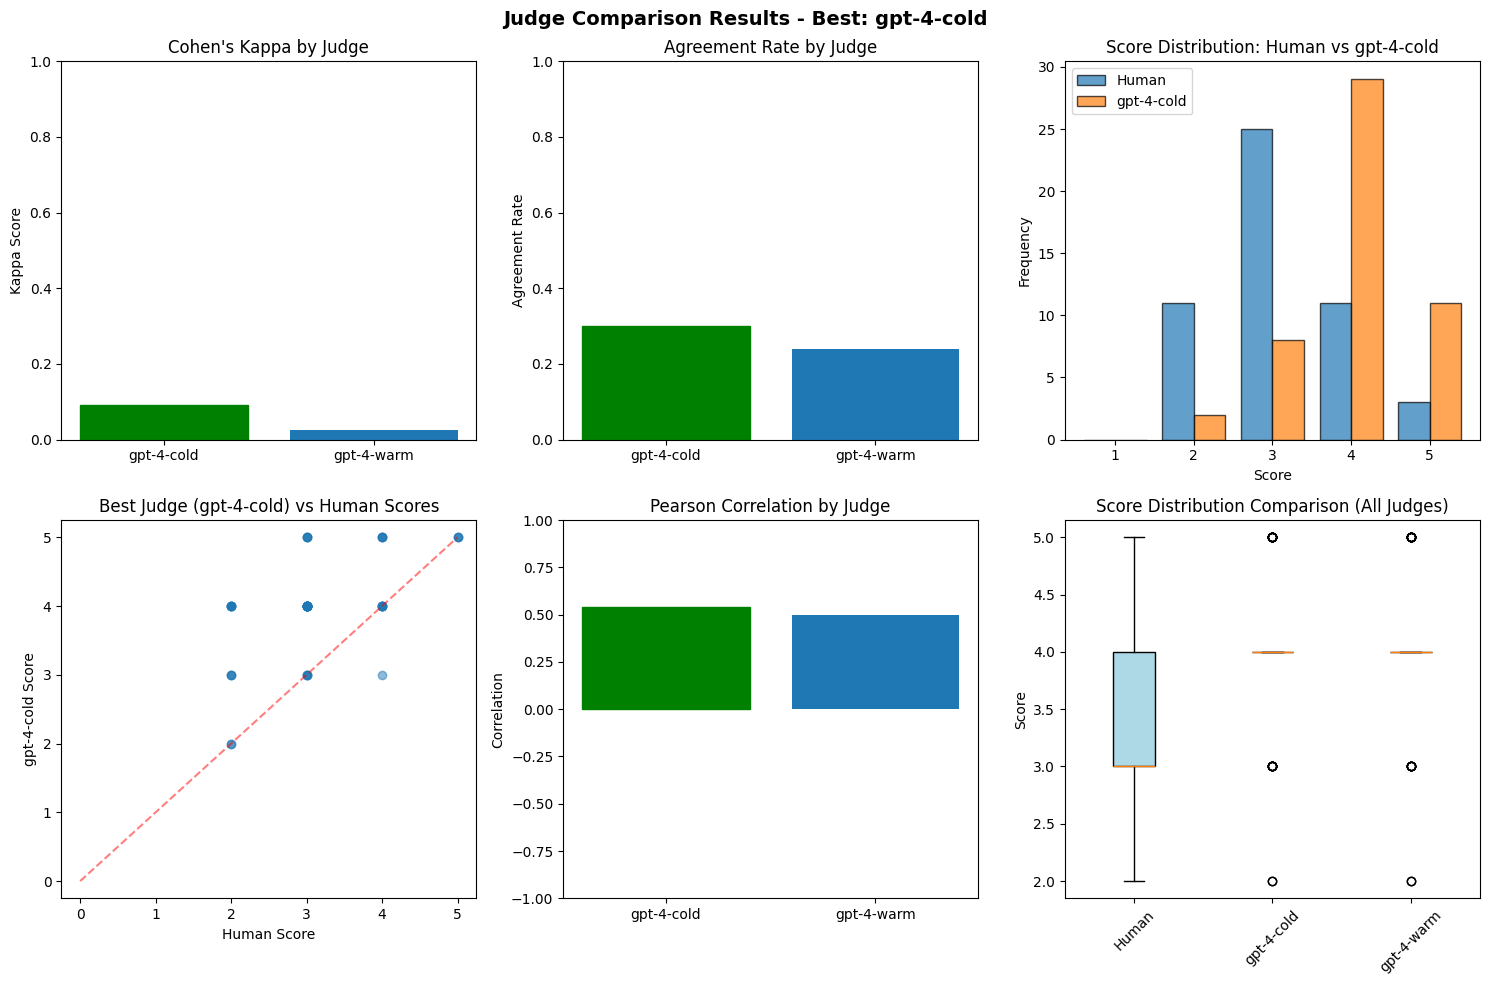

In [21]:
model_comparison.plot_comparison(
    model_results, save_path="model_comparison.png", show=True
)

In [22]:
disagreements = prompt_comparison.get_disagreement_items(prompt_results, threshold=1.0)
print(f"\nFound {len(disagreements)} items with high disagreement between prompts")


Found 13 items with high disagreement between prompts


In [23]:
print(disagreements)

    human_score  strict  balanced  lenient  extremely_strict
0           5.0     3.0       5.0      5.0               3.0
2           4.0     3.0       4.0      5.0               2.0
7           4.0     3.0       4.0      5.0               2.0
8           3.0     2.0       3.0      5.0               2.0
11          3.0     3.0       4.0      5.0               2.0
21          3.0     2.0       4.0      5.0               2.0
25          2.0     2.0       3.0      5.0               2.0
31          2.0     2.0       3.0      5.0               2.0
37          3.0     2.0       4.0      5.0               2.0
40          3.0     3.0       3.0      5.0               2.0
41          3.0     2.0       3.0      5.0               2.0
48          2.0     3.0       4.0      5.0               2.0
49          3.0     3.0       4.0      5.0               2.0
